In [24]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from PIL import Image


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
profile = ProfileReport(data)

We are going to do data overview:

In [5]:
profile.to_notebook_iframe()

The dataset seems to be small and clean, without the need for preprocessing. In the dataset there are numerical and classification (binary) type of values. 'Death Event' is the column of interest and it is of binary type. For this column there are more negative values than positive values, which means that for the model evauation we will need to use f1 score, which works well with unbalanced datasets. 
Between the features there is also very little correlation.

In [7]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)

As the data is of different types, we would need to scale the values of range between 0 and 1.

In [14]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


We will split the data: 70 % for training and 30 % for testing. This kind of split will work well with the size of the dataset.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Training

As there is very little correlation between features we will do comparison between few methods - SVC (Support Vector Classification), Logistic Regression and also Neural Network with MLP Classifier.

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

log_acc = model.score(X_test, y_test)
log_f1 = f1_score(y_test, y_pred)

In [18]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

svm_acc = model.score(X_test, y_test)
svm_f1 = f1_score(y_test, y_pred)

In [19]:
model = MLPClassifier(hidden_layer_sizes=(128, 128))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

nn_acc = model.score(X_test, y_test)
nn_f1 = f1_score(y_test, y_pred)

In [20]:
print(f"Logistic Regression:\nAccuracy: {log_acc}\nF1 Score: {log_f1}\n")
print(f"Support Vector Machine:\nAccuracy: {svm_acc}\nF1 Score: {svm_f1}\n")
print(f"Neural Network:\nAccuracy: {nn_acc}\nF1 Score: {nn_f1}\n")

Logistic Regression:
Accuracy: 0.7666666666666667
F1 Score: 0.5714285714285714

Support Vector Machine:
Accuracy: 0.7444444444444445
F1 Score: 0.46511627906976755

Neural Network:
Accuracy: 0.7777777777777778
F1 Score: 0.6551724137931034



As we can see, among compared models, best performance was acquired when using Neural Networks. 
Lets compare Acuracy and F1 score of the methods we used to the results obtained by the authors in the publication: 

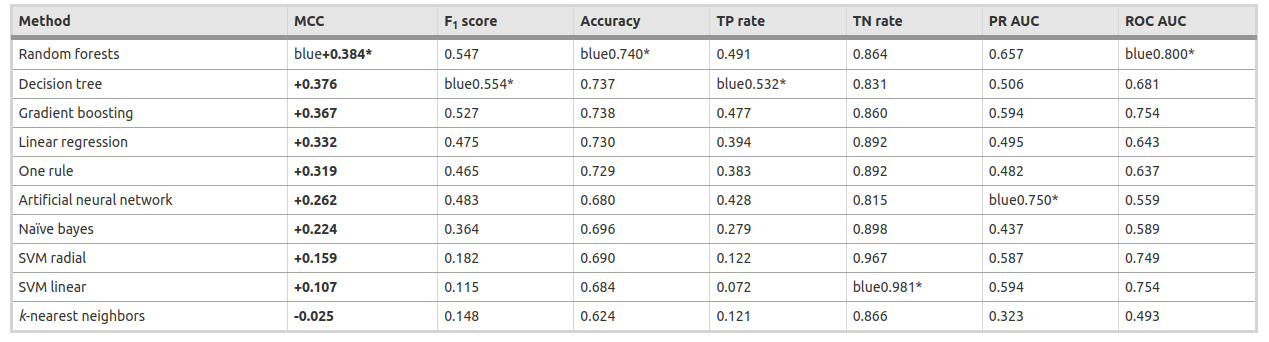

In [32]:
# Visualising figure from publication
image_path = '/kaggle/input/survival-prediction/survival-prediction-results-on-clinical-features.png'
image = Image.open(image_path)
display(image)

F1 scores for the results obtained by authors seem to be lower than the ones got from few methods used in this analysis. As for Accuracy, it also seems to be signinficantly better. It might suggest better performance of the model, but can also mean that data is more intricate and need deeper analysis. 

Credits: 
Chicco, Jurman; 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone',BMC Medical Informatics and Decision Making volume 20,16, (2020), 
Gabriel Atkin (original ML models)